Experiment with the copulpy package
===

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from copulpy.tests.test_auxiliary import generate_random_request
from copulpy.clsUtilityCopula import UtilityCopulaCls
from copulpy.shared.auxiliary import distribute_copula_spec

np.random.seed(123)

In [4]:
for _ in range(1):
    x, y, is_normalized, copula_spec = generate_random_request({'version': 'nonstationary'})

    copula = UtilityCopulaCls(copula_spec)
    util = copula.evaluate(x, y, is_normalized)

    alpha, beta, gamma, y_scale, version = \
        distribute_copula_spec(copula_spec, 'alpha', 'beta', 'gamma', 'y_scale', 'version')

    print('version: {}'.format(version))
    print('alpha: {0:.2f}, beta: {1:.2f}, gamma: {2:.2f}, y_scale: {3:.2f}'.format(
        alpha, beta, gamma, y_scale)
    )
    print('x: {0:.2f}, y: {1:.2f}, utility: {2:.2f}.'.format(x, y, util))

    # Don't expect monotonicity here
    print(copula.evaluate(x, y))
    print(copula.evaluate(x, y, t=0))
    print(copula.evaluate(x, y, t=1))
    print(copula.evaluate(x, y, t=3))
    print(copula.evaluate(x, y, t=6))
    print(copula.evaluate(x, y, t=12))
    print(copula.evaluate(x, y, t=24))

    print('\n')

version: nonstationary
alpha: 0.52, beta: 0.83, gamma: 0.63, y_scale: 6.85
x: 7.00, y: 6.61, utility: 17.23.
17.233836156346772
17.233836156346772
32.21784751261115
17.313416959010777
34.65571226114857
28.45693491000336
19.733433736633906




In [13]:
# Create an instance of the copula class by hand.

# TODO: This is super inconvenient. Need to simplify the procedure.
specs = {'alpha': 0.8,
         'beta': 0.7,
         'gamma': 0.6,
         'discount_factors': {0: 1, 1: 0.95, 3: 0.9, 6: 0.8, 12: 0.7, 24: 0.4},
         'y_scale': 0.5,
         'unrestricted_weights': None,
         'version': 'nonstationary',
        }
copula_specs = {'version': 'nonstationary', 'nonstationary': specs}

copula = UtilityCopulaCls(copula_specs)
print(copula.evaluate(10, 10))
print(copula.evaluate(10, 10, 0))
print(copula.evaluate(10, 10, 24))

7.245315657543012
7.245315657543012
3.2166673782445714


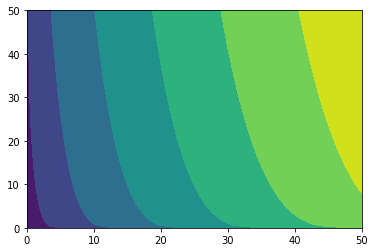

In [25]:
# Plot the copula.

# Vectorize evaluation
eval_copula_self = lambda x, y: copula.evaluate(x, y)
vec_eval_copula = np.vectorize(eval_copula_self)

# Make 2D grid
nx, ny = (100, 100)
x = np.linspace(0, 50, nx)
y = np.linspace(0, 50, ny)
xv, yv = np.meshgrid(x, y)

# Evaluate copula
z = vec_eval_copula(xv, yv)

# Plot surface
plt.interactive(True)
plt.subplots()
plt.contourf(x,y,z)